In [2]:
# Selecting Area of Interest using Color Threshold : Create Blue screen i.e. background and replace it with new 
# image of your choice.
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [144]:
image = cv2.imread("/Users/mayurjain/Documents/evolution.jpg")

In [145]:
# Shape of image
print(image.shape)

(900, 1440, 3)


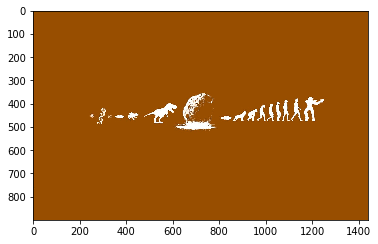

In [146]:
# OpenCV reads the image as BGR, the image is RGB
plt.imshow(image)

In [147]:
# Convert BGR into RGB
image_copy = np.copy(image)
image_rgb = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

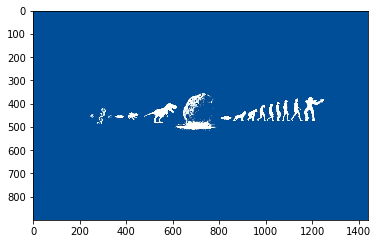

In [148]:
# Image in RGB format
plt.imshow(image_rgb)

In [155]:
# Creating threshold to extract Blue Background
l_val = np.array([0,78,151])
h_val = np.array([10,78,152])

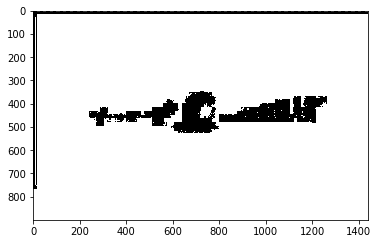

In [156]:
# Creating a mask
mask = cv2.inRange(image_rgb,l_val,h_val)
plt.imshow(mask,cmap='gray')

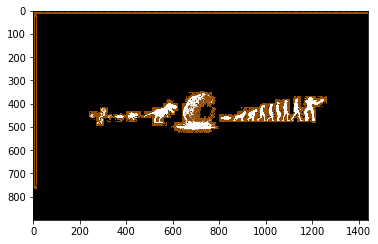

In [157]:
masked_image = np.copy(image_copy)
masked_image[mask !=0] = [0,0,0]
plt.imshow(masked_image)

In [158]:
masked_image.shape

(900, 1440, 3)

In [159]:
bgi = cv2.imread("/Users/mayurjain/Documents/space.jpg")
bgi_rgb = cv2.cvtColor(bgi,cv2.COLOR_BGR2RGB)
bgi_crop = bgi_rgb[0:900,0:1440]

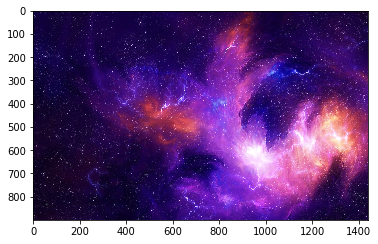

In [160]:
plt.imshow(bgi_crop)

In [161]:
bgi_crop[mask == 0] = [0,0,0]

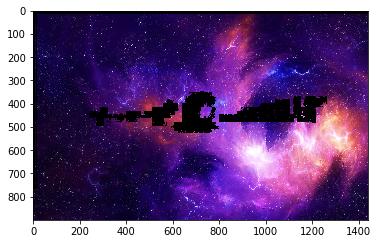

In [162]:
plt.imshow(bgi_crop)

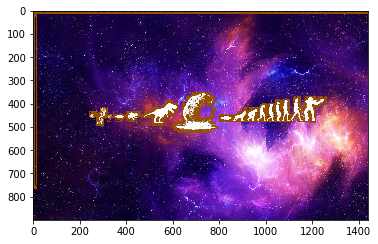

In [163]:
face_space = masked_image + bgi_crop
plt.imshow(face_space)

In [2]:
# Overcoming problems with one color background using HSV

color_balls = cv2.imread("/Users/mayurjain/Documents/Color_balls.png")

In [6]:
color_ball = cv2.cvtColor(color_balls,cv2.COLOR_BGR2RGB)

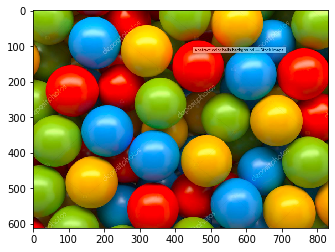

In [23]:
image_copy = np.copy(color_ball)
plt.imshow(image_copy)

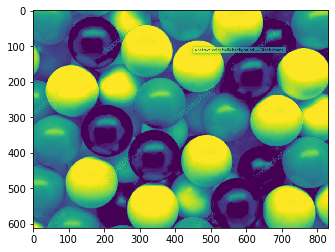

In [8]:
red_channel = image_copy[:,:,0]
plt.imshow(red_channel)

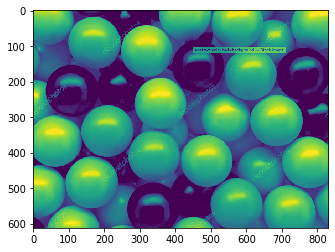

In [11]:
green_channel = image_copy[:,:,1]
plt.imshow(green_channel)

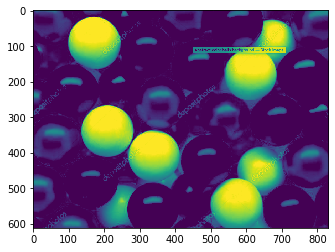

In [12]:
blue_channel = image_copy[:,:,2]
plt.imshow(blue_channel)

In [13]:
# Convert from RGB to HSV
# Value channel of HSV is highly affected by Lightning conditions and 
# it also helps in changing the brightness of the image

color_ball_hsv = cv2.cvtColor(image_copy,cv2.COLOR_RGB2HSV)

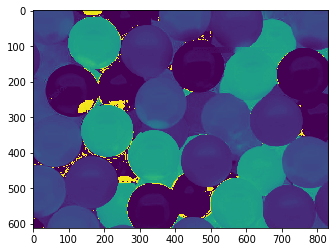

In [14]:
hue_ = color_ball_hsv[:,:,0]
plt.imshow(hue_)

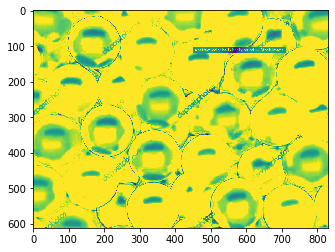

In [15]:
saturation_ = color_ball_hsv[:,:,1]
plt.imshow(saturation_)

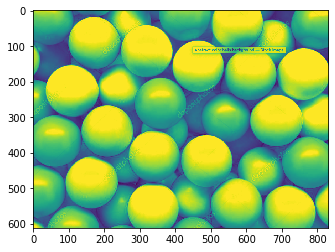

In [16]:
value_ = color_ball_hsv[:,:,2]
plt.imshow(value_)

In [19]:
l_red = np.array([30,0,0])
h_red = np.array([255,160,120])

In [20]:
image_rgb = np.copy(image_copy)

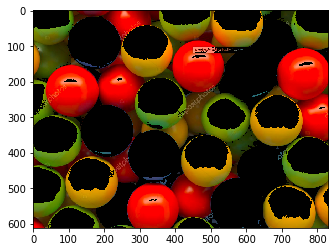

In [26]:
red_balls_mask = cv2.inRange(image_rgb,l_red,h_red)
masked_image = np.copy(image_rgb)
masked_image[red_balls_mask==0] = [0,0,0]
plt.imshow(masked_image)

In [56]:
l_red_hsv = np.array([0,118,0])
h_red_hsv = np.array([9,255,255])

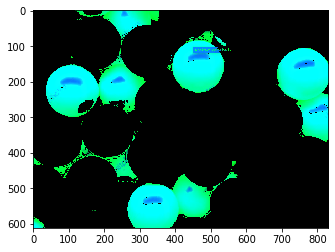

In [57]:
# Clear distinction between the color red and others
red_balls_mask = cv2.inRange(color_ball_hsv,l_red_hsv,h_red_hsv)
masked_image = np.copy(color_ball_hsv)
masked_image[red_balls_mask==0] = [0,0,0]
plt.imshow(masked_image)

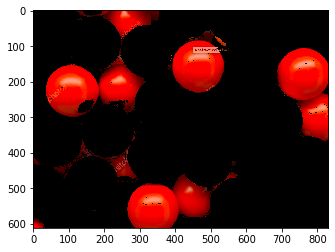

In [58]:
# Clear distinction between the color red and others in RGB format
red = cv2.cvtColor(masked_image,cv2.COLOR_HSV2RGB)
plt.imshow(red)

# Creating Filter 


Frequency in Images: Drastic change in pixel value in bunch or group of pixel
                     helps in identifying the edge in image.

High Frequency image: Images where the intensity changes a lot i.e. level of brightness changes quickly from one pixel
                      to another.

Low Frequency Image:  Images where the intensity don't change a lot i.e. level of brightness changes slowly from one pixel
                      to another.

Fourier Transform : https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

Filters: Filters unwanted information and also to amplify the feature of interest or region of interest.

High Pass filter : Sharpens the images and Enhances the high frequency parts of the image. Sometimes HPF can exaggerate
                   noise in the image by amplifying it like in the image of light house where the edges are detected 
                   between the stones of the light house.

Edge Handling:
Kernel convolution relies on centering a pixel and looking at it's surrounding neighbors. 
So, what do you do if there are no surrounding pixels like on an image corner or edge? Well, 
there are a number of ways to process the edges, which are listed below. It’s most common to 
use padding, cropping, or extension. In extension, the border pixels of an image are copied 
and extended far enough to result in a filtered image of the same size as the original image.

Extend:
The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. 
Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.

Padding:
The image is padded with a border of 0's, black pixels.

Crop:
Any pixel in the output image which would require values from beyond the edge is skipped. 
This method can result in the output image being slightly smaller, with the edges having been cropped.

Gradients:
Gradients are a measure of intensity change in an image, and they generally mark object boundaries 
and changing area of light and dark. If we think back to treating images as functions, F(x, y), 
we can think of the gradient as a derivative operation F ’ (x, y). 
Where the derivative is a measurement of intensity change.

Noise:
    Speckle or discoloration of the image.
    Doesn't contain any useful information
    
Before Applying HPF on an image, its better to remove the noise from the image because HPF exaggerate the image 
intensity so viceversa it will also increase the noise content of the image. So we will applying LPF before HPF to 
reduce the noise in the image.

Low Pass Filter(LPF):
    Blur/smoothens the image.
    Block high frequency parts of the image.



In [ ]:
light_house = cv2.imread("/Users/mayurjain/Documents/light_house.jpeg")

In [26]:
image_copy = np.copy(light_house)
lh_rgb = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

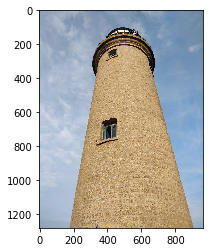

In [27]:
plt.imshow(lh_rgb)

In [28]:
lh_grayscale = cv2.cvtColor(lh_rgb,cv2.COLOR_RGB2GRAY)

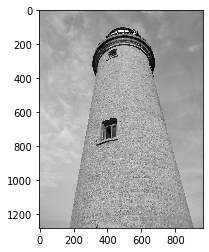

In [29]:
plt.imshow(lh_grayscale,cmap='gray')

In [30]:
# Custom Kernal
# Sobel Filter

#sobel_x
vertical_kernal = np.array([[-1,0,1],
                            [-2,0,2],
                            [-1,0,1]])

In [31]:
filtered_img = cv2.filter2D(lh_grayscale,-1,vertical_kernal)

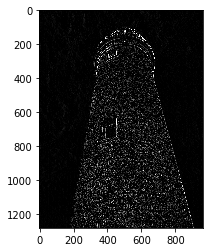

In [32]:
plt.imshow(filtered_img,cmap='gray')

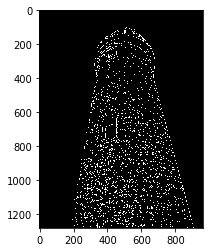

In [44]:
# Create Binary Image

retval,black_white_img = cv2.threshold(filtered_img,70,255,cv2.THRESH_BINARY)
plt.imshow(black_white_img,cmap='gray')

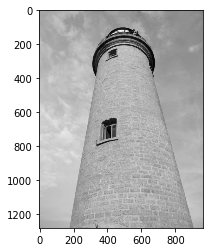

In [40]:
# LPF - To reduce the noise in the image by smoothening it or averaging the pixel point by surrounding pixel value.

gray_blur = cv2.GaussianBlur(lh_grayscale,(5,5),0)
plt.imshow(gray_blur,cmap='gray')

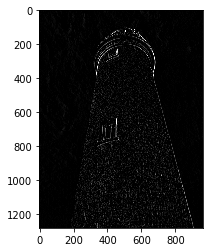

In [42]:
# Applying the HPF after LPF

filtered_image = cv2.filter2D(gray_blur,-1,vertical_kernal)
plt.imshow(filtered_image,cmap='gray')

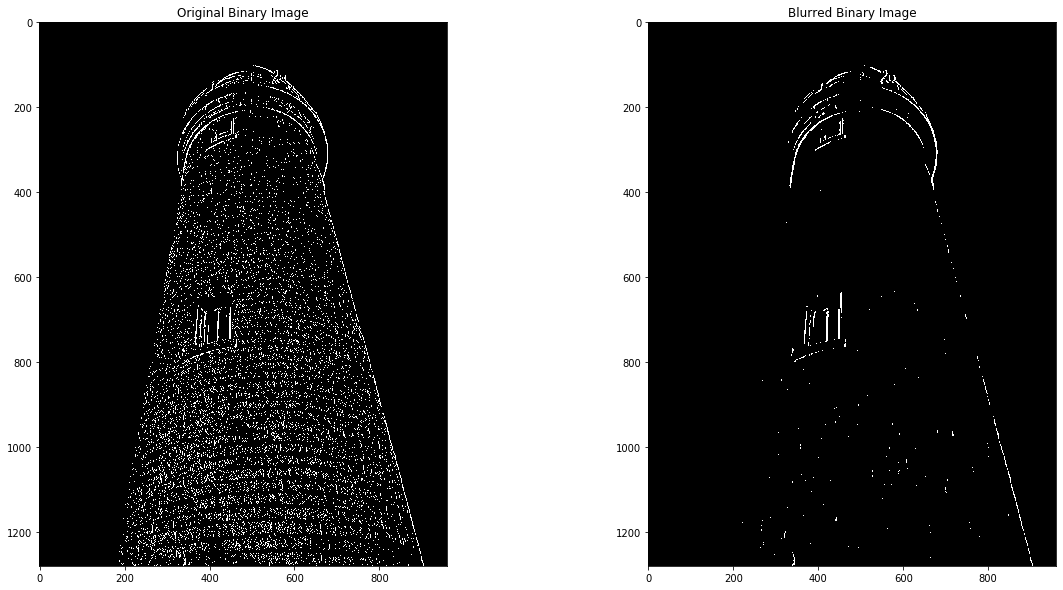

In [49]:
# Create Binary Image

retval,black_white_img_blur = cv2.threshold(filtered_image,80,255,cv2.THRESH_BINARY)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Original Binary Image")
ax1.imshow(black_white_img,cmap='gray')

ax2.set_title("Blurred Binary Image")
ax2.imshow(black_white_img_blur,cmap='gray')

***The noise in the image is reduced drastically after applying low pass filter like Gaussian Blur to reduce the noise and the applying filter like Sobel Filter (Edge Detector).***

""" 
        
        Canny Edge Detection :
            * Gaussian Blur
            * HPF - SOBEL Filter
            * Applies Non-maximum suppression to isolate the strong edges and thin them to one pixel wide lines.
            * Uses hysteresis to isolate the best edges
"""

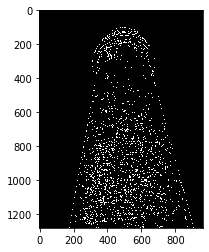

In [53]:
# Its better to have threshold (l:h) value as (1:2 or 1:3) for better results

lower = 120
upper = 240
edge = cv2.Canny(lh_grayscale,lower,upper)
plt.imshow(edge,cmap='gray')

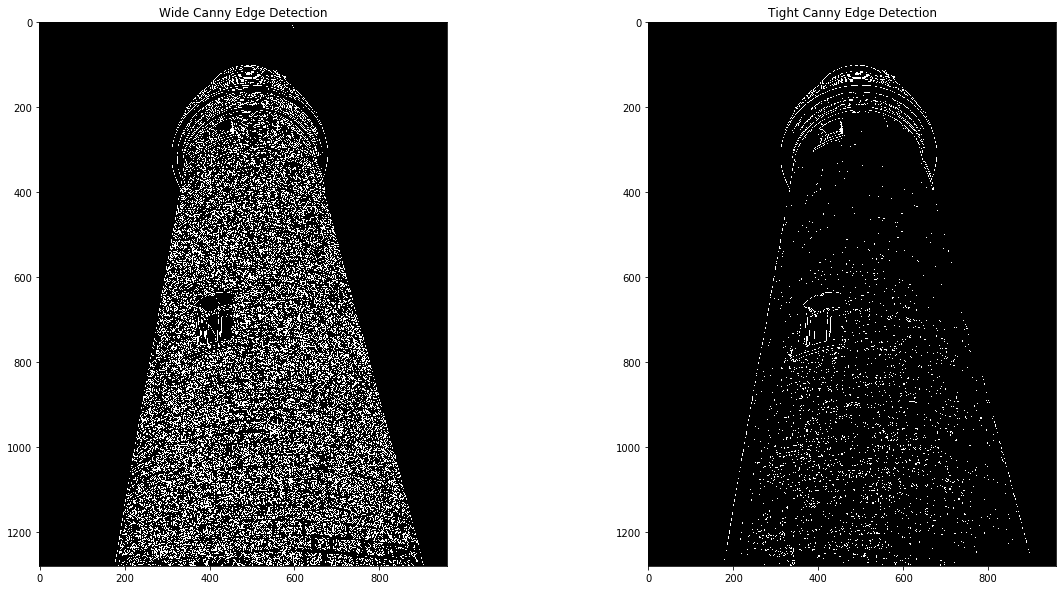

In [57]:
# Applying Canny with wide and tight threshold
wide = cv2.Canny(lh_grayscale,60,100)
tight = cv2.Canny(lh_grayscale,200,240)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Wide Canny Edge Detection")
ax1.imshow(wide,cmap='gray')

ax2.set_title("Tight Canny Edge Detection")
ax2.imshow(tight,cmap='gray')

## Hough Transform

http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

After finding Edges, it is obvious that we find the object which is encapsulated by the edges. So Hough Transform
helps in transforming image data from the x-y coordinate system into Hough space, where you can easily identify simple boundaries like lines and circles. HT is used in shape recognition applications.

Line Detection: 
    Hough space - it converts line in image space into a point in Hough Space. Line equation is "y = mx + c" where m and c are constant. So (m,c) point in hough space is the point convert from line.

In [9]:
light_house_2 = cv2.imread("/Users/mayurjain/Documents/light_house.jpeg")

In [10]:
lh2_rgb = cv2.cvtColor(light_house_2,cv2.COLOR_BGR2RGB)
lh2_gray = cv2.cvtColor(lh2_rgb,cv2.COLOR_RGB2GRAY)

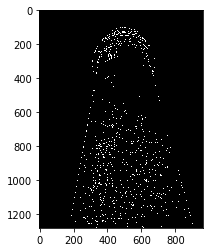

In [12]:
low = 200
high = 240
lh_canny = cv2.Canny(lh2_gray,low,high)
plt.imshow(lh_canny,cmap='gray')

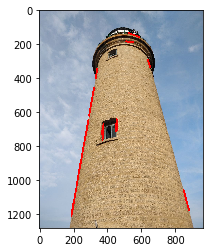

In [28]:
# hough line detection
rho = 1
theta = np.pi/180
threshold = 60
max_line_length = 40
max_line_gap = 5

lines = cv2.HoughLinesP(lh_canny,rho,theta,threshold, np.array([]),max_line_length,max_line_gap)
line_img = np.copy(lh2_rgb)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),10)
        
plt.imshow(line_img,cmap='gray')

## Features and Object Recognition

Face detection using Haar Cascade Algorithm, where haar features are applied on top of the face to extract features like eyes, nose and other such. Haar Features are gradient measurements that look at rectangular region around a certain pixel area and somewhat subtract these areas to calculate the pixel difference. It detects edges, lines and complex rectangular patterns.

There are set of Haar Features which identifies the region of interest on a face and helps in removing the unwanted features from the image, by applying these set of haar features one after another, we reduce the unwanted information and keep only the features related to face.

https://towardsdatascience.com/teaching-cars-to-see-advanced-lane-detection-using-computer-vision-87a01de0424f


## Types of Features:

https://en.wikipedia.org/wiki/Feature_detection_(computer_vision)

Edges: Areas in Image where intensity changes abruptly.(Area with High Intensity Gradient)

Corners: Intersection of two edges which looks like corner or sharp points.

Blobs: Region based features; areas of high and low intensity or unique texture.


Among the above feature, if images of same classes are taken, then Corners in the image will be present in both the images, which will help in identifying or classifying the image. So corners are easiest to match because they are unique and act as a good feature.
https://en.wikipedia.org/wiki/Corner_detection


In [9]:
# Corner Detection

chess_img = cv2.imread("/Users/mayurjain/Documents/chess.jpg")
chess_rgb = cv2.cvtColor(chess_img,cv2.COLOR_BGR2RGB)
chess_gray = cv2.cvtColor(chess_rgb,cv2.COLOR_RGB2GRAY)

# Predefined Corner Detector Harris - requires float32

f_32 = np.float32(chess_gray)

# Detect Corner 

dst = cv2.cornerHarris(chess_gray,2,3,0,0.04)

dst_dilate = cv2.dilate(dst,None)

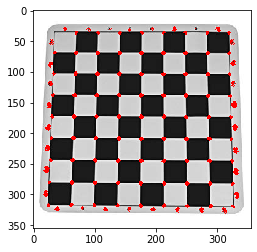

In [12]:
# Finding the strong corners

threshold = 0.1*dst.max()
threshold_dilate = 0.1*dst_dilate.max()

image_copy = np.copy(chess_rgb)

for j in range(0,dst.shape[0]):
    for i in range(dst.shape[1]):
        if (dst[j,i] > threshold):
            cv2.circle(image_copy,(i,j),2,(255,0,0),1)
            
plt.imshow(image_copy)

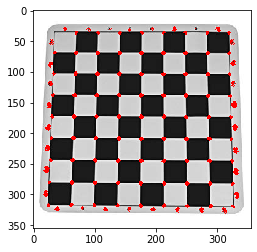

In [13]:
for j in range(0,dst_dilate.shape[0]):
    for i in range(dst_dilate.shape[1]):
        if (dst[j,i] > threshold_dilate):
            cv2.circle(image_copy,(i,j),2,(255,0,0),1)
            
plt.imshow(image_copy)

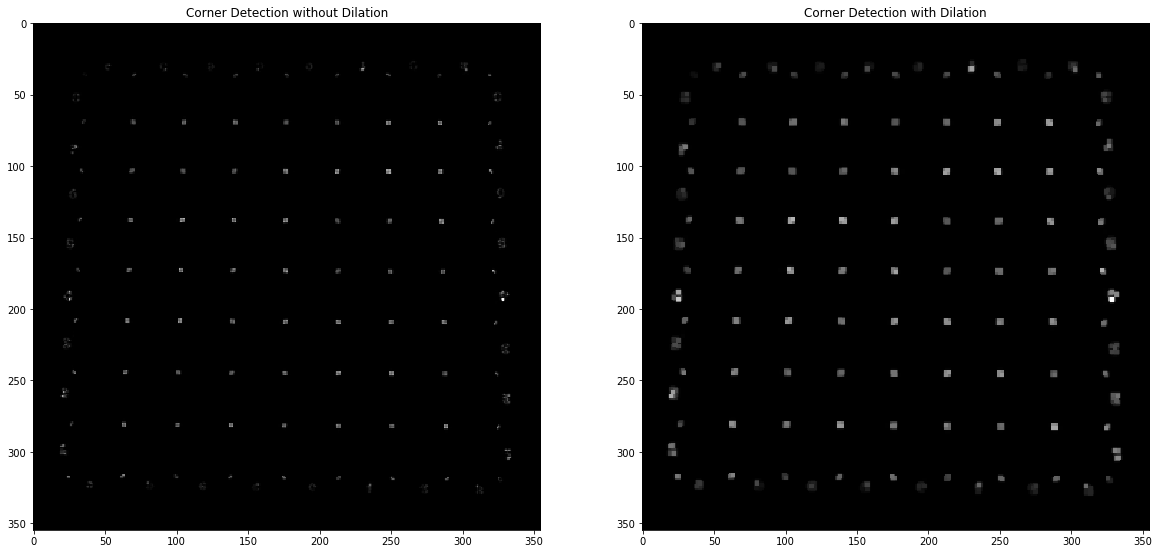

In [10]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Corner Detection without Dilation")
ax1.imshow(dst,cmap='gray')

ax2.set_title("Corner Detection with Dilation")
ax2.imshow(dst_dilate,cmap='gray')

# Dilation and Erosion

* Operation is performed on Binary Image and these are morphological operation like contour detection. 

* Dilation is applied when you want to enlarge the white bright region in image, by adding pixel to the perceived boundries of the object in the image.

* Erosion is applied when you want to shrink the white bright region in image, by removing pixel from the perceived boundries of the object in the image.


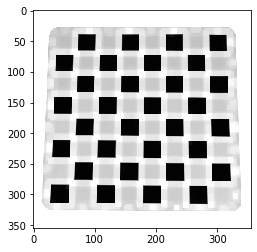

In [4]:
#Dilation

imag_dilation = cv2.imread("/Users/mayurjain/Documents/chess.jpg")
kernel = np.ones((5,5),np.uint8)
dilate_rgb = cv2.cvtColor(imag_dilation,cv2.COLOR_BGR2RGB)
dilate_gray = cv2.cvtColor(dilate_rgb,cv2.COLOR_RGB2GRAY)
dilated_img = cv2.dilate(dilate_gray,kernel,iterations = 2)
plt.imshow(dilated_img,cmap='gray')

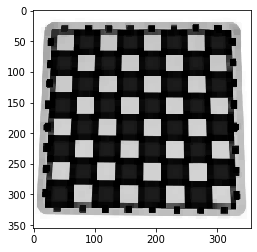

In [5]:
kernel = np.ones((5,5),np.uint8)
erode_rgb = cv2.cvtColor(imag_dilation,cv2.COLOR_BGR2RGB)
erode_gray = cv2.cvtColor(erode_rgb,cv2.COLOR_RGB2GRAY)
erode_img = cv2.erode(erode_gray,kernel,iterations=2)
plt.imshow(erode_img,cmap='gray')

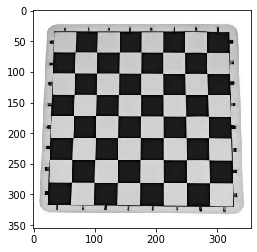

In [7]:
# Opening and Closing techniques for image Cleaning/Enhancement

# Opening refers to erosion followed by dilation, this is useful in noise reduction in which erosion first gets 
# rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared
# It is useful in closing small holes inside the foreground objects, or small black points on the object.from the previous erosion!

opening = cv2.morphologyEx(erode_gray, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

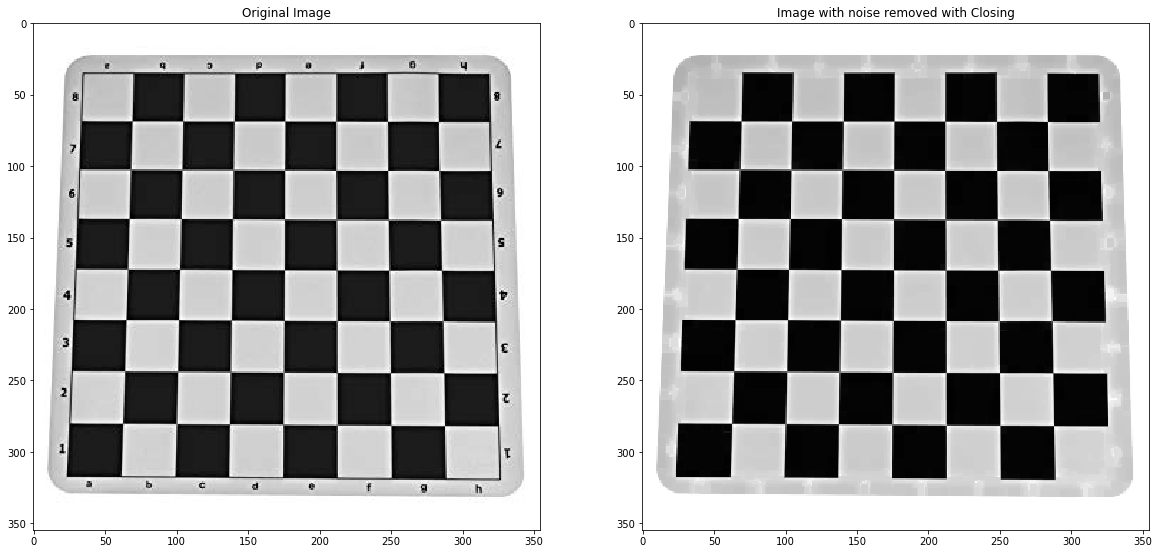

In [12]:
# Closing refers to dilation followed by erosion,which is useful in closing small holes or dark areas within an object.
# It is useful in closing small holes inside the foreground objects, or small black points on the object.

closing = cv2.morphologyEx(erode_gray, cv2.MORPH_CLOSE, kernel)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Original Image")
ax1.imshow(erode_gray,cmap='gray')

ax2.set_title("Image with noise removed with Closing")
ax2.imshow(closing,cmap='gray')


From closing technique, we are able to close the black noise around the chess board. Now its upto the user to understand relevant technique that is applicable for their problem.

Algorithms with Human and Data Bias


Most of the models you've seen and/or programmed, rely on large sets of data to train and learn. When you approach a challenge, it's up to you as a programmer, to define functions and a model for classifying image data. Programmers and data define how classification algorithms like face recognition work.

It's important to note that both data and humans come with their own biases, with unevenly distributed image types or personal preferences, respectively. And it's important to note that these biases propagate into the creation of algorithms. If we consider face recognition, think about the case in which a model like a Haar Cascade is trained on faces that are mainly white and female; this network will then excel at detecting those kinds of faces but not others. If this model is meant for general face recognition, then the biased data has ended up creating a biased model, and algorithms that do not reflect the diversity of the users it aims to serve is not very useful at all.

Analyzing Fairness
Identifying the fairness of a given algorithm is an active area of research. Here is an example of using a GAN (Generative Adversarial Network) to help a classifier detect bias and correct it's predictions: Implementing a fair classifier in PyTorch. And another paper that shows how "fair" credit loans affect diff populations (with helpful, interactive plots). I think that as computer vision becomes more ubiquitous, this area of research will become more and more important, and it is worth reading about and educating yourself!

https://hbr.org/2018/02/can-we-keep-our-biases-from-creeping-into-ai?utm_campaign=hbr&utm_source=twitter&utm_medium=social